<a href="https://colab.research.google.com/github/bhavrish/CVD-Classifer/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
df = pd.read_csv('./Data/cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df_feat = df.iloc[:,1:-1] # everything but last column
df_feat.head() # age is in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [5]:
silhoutte_scores = []

for k in range(2, 20):
    model = GaussianMixture(n_components= k, init_params= "kmeans" )
    labels = model.fit_predict(df_feat)
    ss = metrics.silhouette_score(df_feat, labels, metric = "euclidean")
    silhoutte_scores.append(ss)
    print(ss)
    

0.015554249681054129
-0.03519751832028954
-0.02075757739686692
-0.0558109431250736
-0.0546596269689059
-0.052502431447628936
-0.36122786469189405
-0.4127147238634141
-0.0905853115830686
-0.36068720468999044
-0.285387033211206
-0.6383077056429958
-0.2366880528289686
-0.7214180719145046
-0.5022782137710385
-0.7841982516505226
-0.5232851893001131
-0.49470219608345256


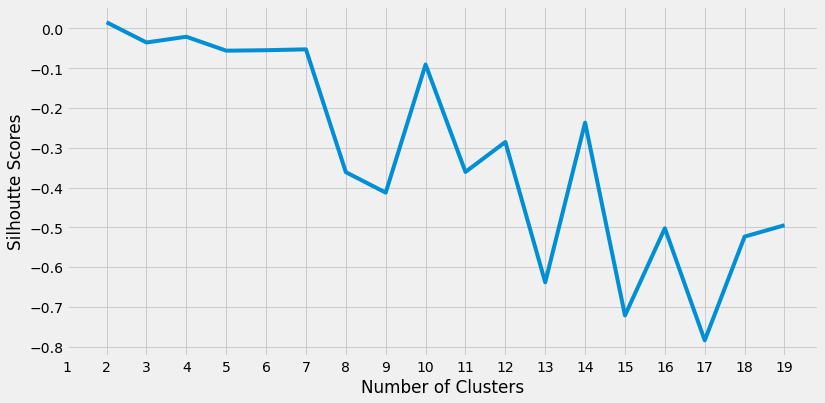

In [6]:
# plot results (N vs silhoutte scores)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), silhoutte_scores)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.show()
